<a href="https://colab.research.google.com/github/MaxSMCON/Group_2/blob/main/Group_2_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group 2 Project

## Global food in 

in this project we are going to investigate 

In [88]:
# https://drive.google.com/file/d/1SbW8ns8H5HDE0FVH5pvZ5GkGUdPV_RgY/view?usp=sharing




In [222]:
import pandas as pd
from pandas_profiling import ProfileReport

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
import seaborn as sns
%matplotlib inline
from IPython.display import display
import requests
import io
from io import StringIO
# Sklearn
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import f1_score, plot_confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn import metrics

from statsmodels.discrete.discrete_model import Logit
from scipy.special import logit
from scipy import stats
# StatsModel
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.formula.api as sm
from statsmodels.graphics.regressionplots import plot_regress_exog, plot_fit, plot_leverage_resid2, influence_plot
from scipy.stats import boxcox 
from scipy.stats import yeojohnson
import seaborn as sns 

In [90]:
# 1MfuleO34g6ZP1saJ1Ej7J7p4SCWYkAmG1MfuleO34g6ZP1saJ1Ej7J7p4SCWYkAmG
#https://drive.google.com/file/d/1SbW8ns8H5HDE0FVH5pvZ5GkGUdPV_RgY/view?usp=sharing

# https://drive.google.com/file/d/1SbW8ns8H5HDE0FVH5pvZ5GkGUdPV_RgY/view?usp=sharing

# Introduction

### Some functions

In [91]:
def description(df):
  print('Datframe Shape: \n',df.shape)
  print('Null Values: \n',df.isnull().sum())
  print('Datframe Info: \n', df.info())
  print(df.head())
  return


# Loading the Global Food dataset from google drive [Fact Table]


In [92]:
!pip install googledrivedownloader #black magic
from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id="1SbW8ns8H5HDE0FVH5pvZ5GkGUdPV_RgY",
                                    dest_path="./global_food_prices.csv",
                                    unzip=False)
data = pd.read_csv("global_food_prices.csv")
df = data.copy()
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2014,50.0,NaN
1,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2014,50.0,NaN
2,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2014,50.0,NaN
3,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2014,50.0,NaN
4,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,5,2014,50.0,NaN


In [93]:
df = df.rename(columns = {'adm0_name' : 'Country', 'mkt_name': 'city',} )
df = df.drop(columns= {'adm1_name'})
df.head()


,adm0_id,Country,adm1_id,mkt_id,city,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1.0,Afghanistan,272,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2014,50.0,NaN
1,1.0,Afghanistan,272,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2014,50.0,NaN
2,1.0,Afghanistan,272,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2014,50.0,NaN
3,1.0,Afghanistan,272,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2014,50.0,NaN
4,1.0,Afghanistan,272,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,5,2014,50.0,NaN


In [94]:
df[df['um_name'] == '12 KG' ]

,adm0_id,Country,adm1_id,mkt_id,city,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
363064,45.0,Cameroon,816,2613,Yaoundé-Mfoundi,147,Plantains - Retail,0.0,XAF,15,Retail,90,12 KG,1,2015,2500.0000,NaN
363065,45.0,Cameroon,816,2613,Yaoundé-Mfoundi,147,Plantains - Retail,0.0,XAF,15,Retail,90,12 KG,2,2015,2500.0000,NaN
363066,45.0,Cameroon,816,2613,Yaoundé-Mfoundi,147,Plantains - Retail,0.0,XAF,15,Retail,90,12 KG,3,2015,2500.0000,NaN
363067,45.0,Cameroon,816,2613,Yaoundé-Mfoundi,147,Plantains - Retail,0.0,XAF,15,Retail,90,12 KG,4,2015,2700.0000,NaN
363068,45.0,Cameroon,816,2613,Yaoundé-Mfoundi,147,Plantains - Retail,0.0,XAF,15,Retail,90,12 KG,5,2015,2700.0000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876051,249.0,Turkey,3057,2055,Izmir,341,Fuel (gas) - Retail,0.0,TRY,15,Retail,90,12 KG,12,2020,102.3353,NaN
1876052,249.0,Turkey,3057,2055,Izmir,341,Fuel (gas) - Retail,0.0,TRY,15,Retail,90,12 KG,1,2021,7.3209,NaN
1876053,249.0,Turkey,3057,2055,Izmir,341,Fuel (gas) - Retail,0.0,TRY,15,Retail,90,12 KG,2,2021,7.3257,NaN
1876054,249.0,Turkey,3057,2055,Izmir,341,Fuel (gas) - Retail,0.0,TRY,15,Retail,90,12 KG,3,2021,7.2588,NaN


## Convert mp_price with UOM

In [95]:
url2 ='https://raw.githubusercontent.com/MaxSMCON/Group_2/main/Data%20Storage/UOM_conversion_file.csv'
df_UOM =pd.read_csv(url2, encoding = 'latin-1')

dftest = df.merge(df_UOM,how='left', on= ['cm_name','um_name'],)
df['mp_priceUS'] = np.where(dftest['Conversion_Multiplier'] > 0, dftest['mp_price']*dftest['Conversion_Multiplier'], dftest['mp_price'])
df[df['um_name'] == '12 KG' ]

#Note Do not have conversion for fuel, and commodity item such as toothbrush, tooth paste, and other liquid that is unmeasurable and etc
#UOM in file has not been change but those that have been change will be reflect in mp_price as seen here where 2500 dollar for 12 kg and 208 dollar for 1 KG

,adm0_id,Country,adm1_id,mkt_id,city,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource,mp_priceUS
363064,45.0,Cameroon,816,2613,Yaoundé-Mfoundi,147,Plantains - Retail,0.0,XAF,15,Retail,90,12 KG,1,2015,2500.0000,NaN,208.2500
363065,45.0,Cameroon,816,2613,Yaoundé-Mfoundi,147,Plantains - Retail,0.0,XAF,15,Retail,90,12 KG,2,2015,2500.0000,NaN,208.2500
363066,45.0,Cameroon,816,2613,Yaoundé-Mfoundi,147,Plantains - Retail,0.0,XAF,15,Retail,90,12 KG,3,2015,2500.0000,NaN,208.2500
363067,45.0,Cameroon,816,2613,Yaoundé-Mfoundi,147,Plantains - Retail,0.0,XAF,15,Retail,90,12 KG,4,2015,2700.0000,NaN,224.9100
363068,45.0,Cameroon,816,2613,Yaoundé-Mfoundi,147,Plantains - Retail,0.0,XAF,15,Retail,90,12 KG,5,2015,2700.0000,NaN,224.9100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876051,249.0,Turkey,3057,2055,Izmir,341,Fuel (gas) - Retail,0.0,TRY,15,Retail,90,12 KG,12,2020,102.3353,NaN,102.3353
1876052,249.0,Turkey,3057,2055,Izmir,341,Fuel (gas) - Retail,0.0,TRY,15,Retail,90,12 KG,1,2021,7.3209,NaN,7.3209
1876053,249.0,Turkey,3057,2055,Izmir,341,Fuel (gas) - Retail,0.0,TRY,15,Retail,90,12 KG,2,2021,7.3257,NaN,7.3257
1876054,249.0,Turkey,3057,2055,Izmir,341,Fuel (gas) - Retail,0.0,TRY,15,Retail,90,12 KG,3,2021,7.2588,NaN,7.2588


In [96]:
url = 'https://raw.githubusercontent.com/MaxSMCON/Group_2/main/Data%20Storage/Currence_2021_Exchange.csv'

df_US = pd.read_csv(url)
df_US = df_US.rename(columns ={'Reference area': 'Country'})
df_US['Country'].unique()
description(df_US)

Datframe Shape: 
 (143, 2)
Null Values: 
 Country          0
Exchange Rate    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        143 non-null    object 
 1   Exchange Rate  143 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB
Datframe Info: 
 None
     Country  Exchange Rate
0    Albania     103.031336
1    Algeria     134.421000
2  Argentina      94.155778
3  Australia       1.323348
4    Austria       0.840060


In [97]:
df = df.merge(df_US,
                    how='left', 
                    on= ['Country'])
df[df['Country'] == 'Afghanistan']
# description(dftest32)

,adm0_id,Country,adm1_id,mkt_id,city,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource,mp_priceUS,Exchange Rate
0,1.0,Afghanistan,272,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2014,50.0000,NaN,50.0000,96.02
1,1.0,Afghanistan,272,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2014,50.0000,NaN,50.0000,96.02
2,1.0,Afghanistan,272,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2014,50.0000,NaN,50.0000,96.02
3,1.0,Afghanistan,272,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2014,50.0000,NaN,50.0000,96.02
4,1.0,Afghanistan,272,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,5,2014,50.0000,NaN,50.0000,96.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15422,1.0,Afghanistan,99879,3236,Panjsher,800,Wheat flour (low quality) - Retail,0.0,AFN,15,Retail,5,KG,3,2021,34.0000,NaN,34.0000,96.02
15423,1.0,Afghanistan,99879,3236,Panjsher,800,Wheat flour (low quality) - Retail,0.0,AFN,15,Retail,5,KG,4,2021,35.5000,NaN,35.5000,96.02
15424,1.0,Afghanistan,99879,3236,Panjsher,800,Wheat flour (low quality) - Retail,0.0,AFN,15,Retail,5,KG,5,2021,33.2000,NaN,33.2000,96.02
15425,1.0,Afghanistan,99879,3236,Panjsher,800,Wheat flour (low quality) - Retail,0.0,AFN,15,Retail,5,KG,6,2021,29.6667,NaN,29.6667,96.02


## Normilizing Prices

In [98]:
df.columns

Index(['adm0_id', 'Country', 'adm1_id', 'mkt_id', 'city', 'cm_id', 'cm_name',
       'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id', 'um_name',
       'mp_month', 'mp_year', 'mp_price', 'mp_commoditysource', 'mp_priceUS',
       'Exchange Rate'],
      dtype='object')

In [99]:
df= df.dropna(subset = ['Exchange Rate'], how = "all")

In [100]:
 df['usprice'] = df['mp_priceUS'] / df['Exchange Rate']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [101]:
df.head()

,adm0_id,Country,adm1_id,mkt_id,city,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource,mp_priceUS,Exchange Rate,usprice
0,1.0,Afghanistan,272,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2014,50.0,NaN,50.0,96.02,0.520725
1,1.0,Afghanistan,272,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2014,50.0,NaN,50.0,96.02,0.520725
2,1.0,Afghanistan,272,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2014,50.0,NaN,50.0,96.02,0.520725
3,1.0,Afghanistan,272,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2014,50.0,NaN,50.0,96.02,0.520725
4,1.0,Afghanistan,272,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,5,2014,50.0,NaN,50.0,96.02,0.520725


In [102]:
df_UOM.head()

,cm_name,um_name,Conversion_Multiplier,Base_Unit
0,Bananas - Retail,KG,1.0000,KG
1,Bananas - Retail,12 KG,0.0833,KG
2,Bananas - Retail,Pound,0.4536,KG
3,Bananas - Retail,Unit,7.0000,KG
4,Bananas - Wholesale,KG,1.0000,KG


### Spliting "um_name" by space

In [103]:
# df[['um_name1', 'um_name2']] = df['um_name'].str.rsplit(n=1, expand = True)

In [104]:
# Number of rows for each country

country_unique, country_freq = np.unique(df[['Country', ]], return_counts = True)
listrows = []
for i in range(country_unique.shape[0]):
    
    print(country_unique[i], ': ', country_freq[i])
    listrows.append( [country_unique[i], country_freq[i]])

Afghanistan :  15427
Algeria :  1793
Angola :  1272
Argentina :  990
Armenia :  20600
Azerbaijan :  125
Bangladesh :  7758
Belarus :  444
Benin :  39530
Bhutan :  346
Bolivia :  17424
Burundi :  60921
Cambodia :  21871
Cape Verde :  2135
Central African Republic :  12720
Chad :  18896
China :  1312
Colombia :  26540
Congo :  5257
Costa Rica :  297
Democratic Republic of the Congo :  47052
Djibouti :  6006
Dominican Republic :  2392
Egypt :  2304
Eritrea :  100
Ethiopia :  24627
Gabon :  504
Gambia :  56971
Georgia :  80
Ghana :  25414
Guatemala :  3907
Guinea :  11810
Guinea-Bissau :  19796
Haiti :  13376
Honduras :  1629
Indonesia :  72437
Iraq :  25578
Japan :  1372
Kazakhstan :  3365
Kenya :  8884
Kyrgyzstan :  61188
Lao People's Democratic Republic :  29902
Lebanon :  42784
Lesotho :  9364
Liberia :  12302
Libya :  41207
Madagascar :  9193
Malawi :  22682
Mexico :  3927
Mongolia :  3692
Mozambique :  42278
Myanmar :  26694
Namibia :  7163
Nepal :  18071
Nicaragua :  8610
Niger :  5

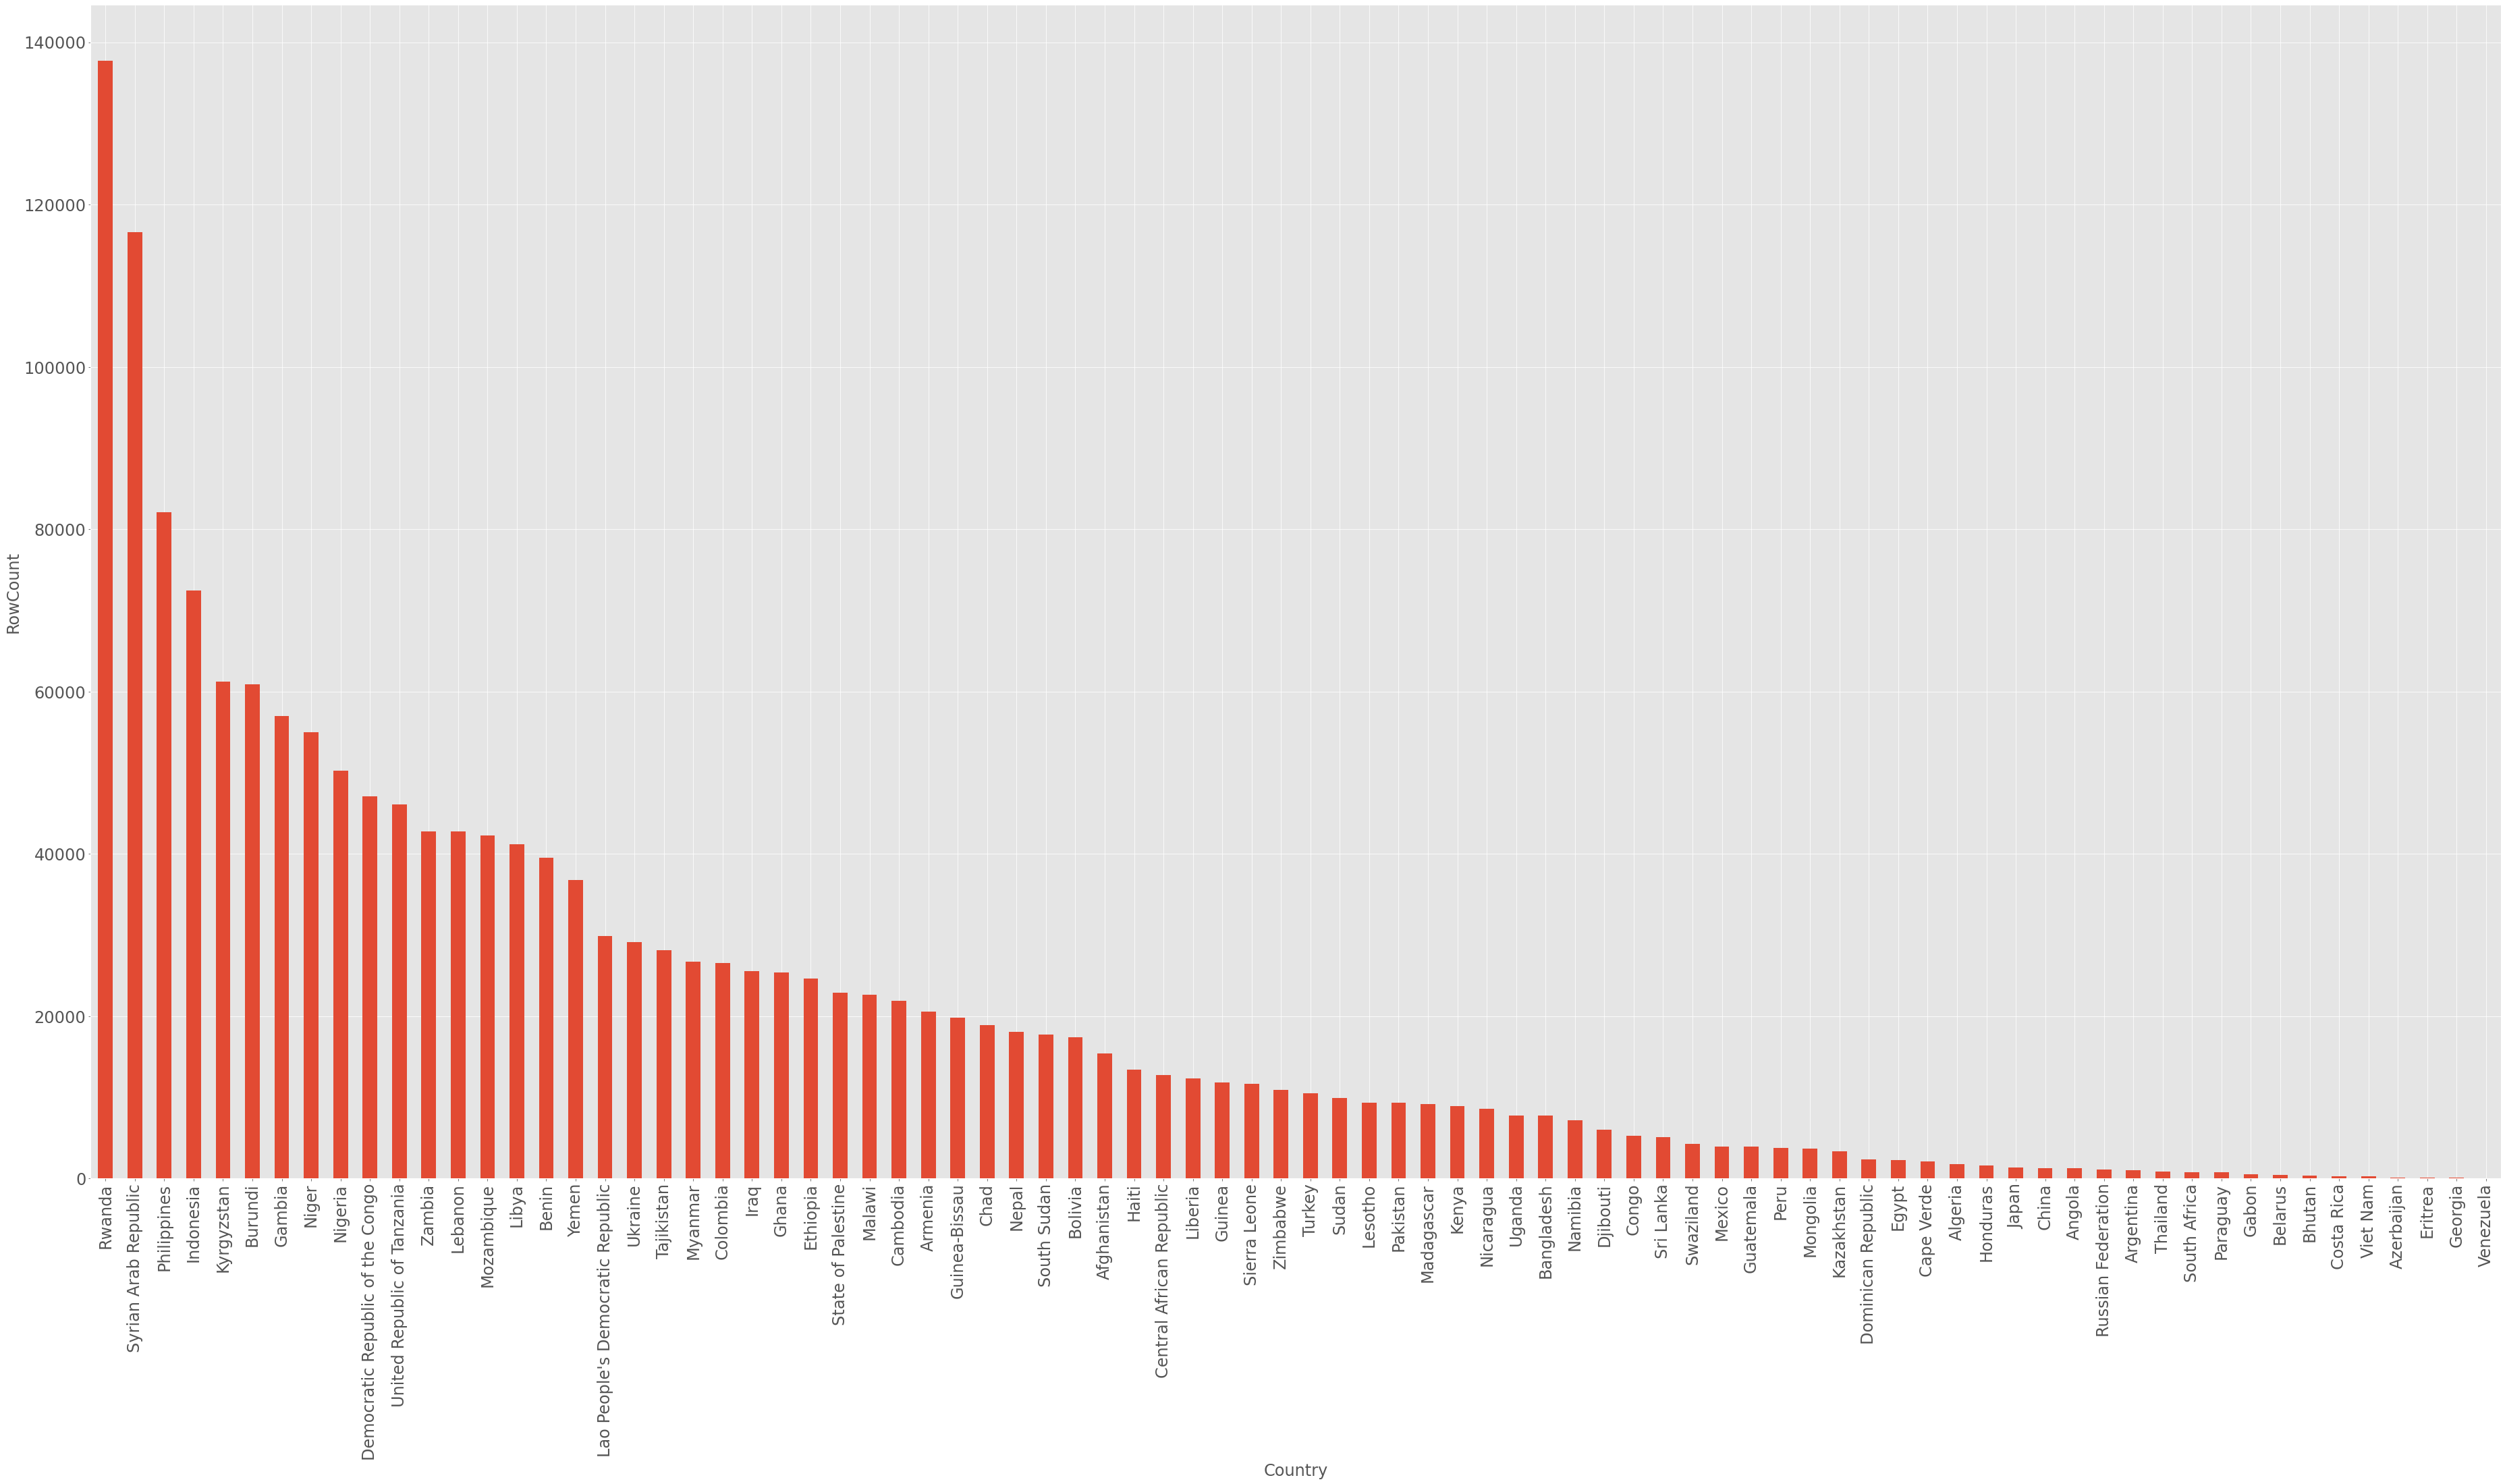

In [105]:
df1 = pd.DataFrame(listrows, columns = ['Country', 'RowCount'])
df1= df1.sort_values(by=['RowCount'],ascending=False)
ax= df1.plot(kind='bar', y = 'RowCount',x ='Country',    
    legend = False,figsize=(64,32), fontsize=24)
ax.set_xlabel("Country",fontsize=24)
ax.set_ylabel("RowCount",fontsize=24)
plt.show()

## Working with GDP data from GitHub 

In [106]:
url = 'https://raw.githubusercontent.com/MaxSMCON/Group_2/main/Data%20Storage/GDP.csv'
df_gdp = pd.read_csv(url, 
                    #  index_col=0, 
                     encoding= 'latin-1' )
df_gdp = pd.melt(df_gdp, id_vars=["Country",
                           "Subject Descriptor",
                            "Units","Scale",
                            "Country/Series-specific Notes"
                            ],
                   var_name ="Year",value_name="Value"
              )
# cleaning Value column
df_gdp['Value'] = df_gdp["Value"].str.replace(',','')
df_gdp['Value'] = df_gdp["Value"].str.replace('--','')

# converting Value column to numeric
df_gdp['Value'] = pd.to_numeric(df_gdp["Value"])

# Dropping attributes
df_gdp = df_gdp.drop(['Subject Descriptor',
                      'Country/Series-specific Notes' ,
                      'Scale',
                      
                      ], axis = 1)
# ///////////////////////////////////
# replacing null values with mean

# df_gdp = df_gdp['Value'].fillna(df_gdp.groupby([
#         'Country',
#         'Year'
# ])['Value'].transform('mean'), inplace = True)
# df_gdp = df_gdp[df_gdp['Value']!='NaN']

# removing zeroes

df_gdp.dropna(inplace= True)
df_gdp['Year'] = pd.to_numeric(df_gdp["Year"])
df_gdp=df_gdp[df_gdp.Year != 'Estimates Start After']# Droping non year values from the file 

# print(df_gdp.shape)
# print('null values\n',df_gdp.isnull().sum())
# print(df_gdp.info())
# df_gdp.head()


## Converting GDP to US dollar

In [107]:
df_gdp.columns

Index(['Country', 'Units', 'Year', 'Value'], dtype='object')

In [108]:
df_US.columns

Index(['Country', 'Exchange Rate'], dtype='object')

In [109]:
df_test1 = pd.merge(
      df_gdp,
      df_US,
          left_on=('Country',),
          right_on=('Country', ),
                    how='left', 
            
                    )
df_test1 = df_test1.dropna(subset = ['Exchange Rate'], how = "all")


In [110]:
df_gdp = df_test1
df_gdp.head()

,Country,Units,Year,Value,Exchange Rate
0,Albania,National currency,1991,252.921,103.031336
1,Algeria,National currency,1991,3393.450,134.421000
2,Angola,National currency,1991,283.298,565.000000
4,Argentina,National currency,1991,350.738,94.155778
6,Australia,National currency,1991,818.854,1.323348


In [111]:
 df_gdp['GDP_in_USD'] = df_gdp['Value'] / df_gdp['Exchange Rate']
 df_gdp.head()

,Country,Units,Year,Value,Exchange Rate,GDP_in_USD
0,Albania,National currency,1991,252.921,103.031336,2.454797
1,Algeria,National currency,1991,3393.450,134.421000,25.244939
2,Angola,National currency,1991,283.298,565.000000,0.501412
4,Argentina,National currency,1991,350.738,94.155778,3.725082
6,Australia,National currency,1991,818.854,1.323348,618.774481


In [112]:
description(df_gdp)

Datframe Shape: 
 (3743, 6)
Null Values: 
 Country          0
Units            0
Year             0
Value            0
Exchange Rate    0
GDP_in_USD       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3743 entries, 0 to 5810
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        3743 non-null   object 
 1   Units          3743 non-null   object 
 2   Year           3743 non-null   int64  
 3   Value          3743 non-null   float64
 4   Exchange Rate  3743 non-null   float64
 5   GDP_in_USD     3743 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 204.7+ KB
Datframe Info: 
 None
     Country              Units  Year     Value  Exchange Rate  GDP_in_USD
0    Albania  National currency  1991   252.921     103.031336    2.454797
1    Algeria  National currency  1991  3393.450     134.421000   25.244939
2     Angola  National currency  1991   283.298     565.00000

## RAMILA CODE START - GDP PIVOT

In [113]:
## Ramila Code
# url = 'https://raw.githubusercontent.com/MaxSMCON/Group_2/main/Data%20Storage/GDP.csv'
# df_gdp = pd.read_csv(url, encoding= 'latin-1' )
# df_gdp = df_gdp.melt(id_vars=[ "Country","Subject Descriptor","Units","Scale","Country/Series-specific Notes"],var_name="Year",value_name="Value")
df_gdp.tail()



,Country,Units,Year,Value,Exchange Rate,GDP_in_USD
5802,United States,National currency,2021,19482.770,1.000000,19482.770000
5803,Uruguay,National currency,2021,1717.060,43.467507,39.502150
5808,Yemen,National currency,2021,206.931,250.250000,0.826897
5809,Zambia,National currency,2021,138.803,172.820000,0.803165
5810,Zimbabwe,National currency,2021,19.040,361.900000,0.052611


In [114]:
# df_gdp=df_gdp.dropna() # Droping all NAN values from the file 
# df_gdp.head()



In [115]:
# df_gdp=df_gdp[df_gdp.Year != 'Estimates Start After']# Droping non year values from the file 
# df_gdp

In [116]:
df_gdp.Year.unique () # all values are Year 

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

## RAMILA CODE END - GDP PIVOT

## loading cost of living dataset from GitHUb

In [117]:
url1 = 'https://raw.githubusercontent.com/MaxSMCON/Group_2/main/Data%20Storage/cost%20of%20living%202020.csv'
df_cost = pd.read_csv(url1,index_col=0)
df_cost = df_cost.drop(['Unnamed: 9',
                      
                      ], axis = 1)
description(df_cost)

Datframe Shape: 
 (135, 8)
Null Values: 
 Country                           0
Cost of Living Index              0
Rent Index                        0
Cost of Living Plus Rent Index    0
Groceries Index                   0
Restaurant Price Index            0
Local Purchasing Power Index      0
McMeal($)                         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 1 to 135
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         135 non-null    object 
 1   Cost of Living Index            135 non-null    float64
 2   Rent Index                      135 non-null    float64
 3   Cost of Living Plus Rent Index  135 non-null    float64
 4   Groceries Index                 135 non-null    float64
 5   Restaurant Price Index          135 non-null    float64
 6   Local Purchasing Power Index    135 non-null    float64
 7  

## LOADING Countries list by region [Dimension Table]

In [118]:
url = 'https://raw.githubusercontent.com/MaxSMCON/Group_2/main/Data%20Storage/UNSD%20%E2%80%94%20Methodology.csv '
df_countries = pd.read_csv(url, index_col=0)
df_region = df_countries[['Region Name','Intermediate Region Name','Country or Area'] ]
df_region = df_region.rename( columns = {'Region Name': 'Continent', 'Intermediate Region Name': 'Region', 'Country or Area': 'Country' })
df_region.head()


,Continent,Region,Country
Global Code,,,
1,Africa,Northern Africa,Algeria
1,Africa,Northern Africa,Egypt
1,Africa,Northern Africa,Libya
1,Africa,Northern Africa,Morocco
1,Africa,Northern Africa,Sudan


In [119]:
# Removing duplicates from country list
df_region = df_region.drop_duplicates(subset = ['Country'])


In [120]:
df_region.dropna(inplace=True)

In [121]:
df_region.isnull().sum()

Continent    0
Region       0
Country      0
dtype: int64

## Child Mortality Upload 

In [122]:
url = 'https://raw.githubusercontent.com/MaxSMCON/Group_2/main/Data%20Storage/child-deaths-igme-data.csv'
df_childMort = pd.read_csv(url, index_col=0)
# Dropping empty values in Code columns. The zeroes belong to continents and regions.
df_childMort.dropna(inplace= True)

description(df_childMort)

Datframe Shape: 
 (10017, 3)
Null Values: 
 Code                           0
Year                           0
Number of under-five deaths    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 10017 entries, Afghanistan to Zimbabwe
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Code                         10017 non-null  object
 1   Year                         10017 non-null  int64 
 2   Number of under-five deaths  10017 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 313.0+ KB
Datframe Info: 
 None
            Code  Year  Number of under-five deaths
Entity                                             
Afghanistan  AFG  1967                       161588
Afghanistan  AFG  1968                       162629
Afghanistan  AFG  1969                       163529
Afghanistan  AFG  1970                       164463
Afghanistan  AFG  1971                       165306


## Birth rate vs Death rate Upload

In [123]:
url = 'https://raw.githubusercontent.com/MaxSMCON/Group_2/main/Data%20Storage/birth-rate-vs-death-rate.csv'
df_BirthDeathRate = pd.read_csv(url, index_col=0)
df_BirthDeathRate = df_BirthDeathRate.loc[df_BirthDeathRate['Code'] != 'NaN']
df_BirthDeathRate = df_BirthDeathRate.drop(['Continent'], axis =1 )
df_BirthDeathRate.dropna(inplace= True)


description(df_BirthDeathRate)

Datframe Shape: 
 (11997, 5)
Null Values: 
 Code                                    0
Year                                    0
Death rate, crude (per 1,000 people)    0
Birth rate, crude (per 1,000 people)    0
Population (historical estimates)       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 11997 entries, Afghanistan to Zimbabwe
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Code                                  11997 non-null  object 
 1   Year                                  11997 non-null  int64  
 2   Death rate, crude (per 1,000 people)  11997 non-null  float64
 3   Birth rate, crude (per 1,000 people)  11997 non-null  float64
 4   Population (historical estimates)     11997 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 562.4+ KB
Datframe Info: 
 None
            Code  ...  Population (historical estimates)
Entit

## Fertility rate 

In [124]:
url = 'https://raw.githubusercontent.com/MaxSMCON/Group_2/main/Data%20Storage/children-per-woman-UN.csv'
df_Fertility = pd.read_csv(url, index_col=0)
df_Fertility = df_Fertility.loc[df_Fertility['Code'] != 'NaN']
df_Fertility.dropna(inplace= True)

df_Fertility = df_Fertility.rename(columns = 
                                   {'Estimates, 1950 - 2020: Annually interpolated demographic indicators - Total fertility (live births per woman)' : 'Fertility'} )

description(df_Fertility)

Datframe Shape: 
 (14413, 3)
Null Values: 
 Code         0
Year         0
Fertility    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 14413 entries, Afghanistan to Zimbabwe
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Code       14413 non-null  object 
 1   Year       14413 non-null  int64  
 2   Fertility  14413 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 450.4+ KB
Datframe Info: 
 None
            Code  Year  Fertility
Entity                           
Afghanistan  AFG  1950       7.45
Afghanistan  AFG  1951       7.45
Afghanistan  AFG  1952       7.45
Afghanistan  AFG  1953       7.45
Afghanistan  AFG  1954       7.45


In [125]:
url = 'https://raw.githubusercontent.com/MaxSMCON/Group_2/main/Data%20Storage/raw_proces_other.csv'
df_class = pd.read_csv(url)
df_class

,COMMODITY,TYPE
0,Bread,PROCESSED
1,Wheat,RAW
2,Rice,RAW
3,Wage,OTHER
4,Livestock,RAW
...,...,...
144,Internet,OTHER
145,Electricity,OTHER
146,Curd,PROCESSED
147,Sour,PROCESSED


## Create Date Column

In [126]:
# Create a Date Column
df["Date"] = [  y+ " " +x for x,y in list(zip(df["mp_month"].astype(str).values, df["mp_year"].astype(str).values)) ]
df["Date"] = pd.to_datetime(df["Date"])

In [127]:
df = df.set_index("Date")

## Leaving comodity names with the first words

In [128]:
df['cm_name'] = df['cm_name'].str.split(" ", 1, expand = True)
df['cm_name'].head()

Date
2014-01-01    Bread
2014-02-01    Bread
2014-03-01    Bread
2014-04-01    Bread
2014-05-01    Bread
Name: cm_name, dtype: object

In [129]:
df.head()

,adm0_id,Country,adm1_id,mkt_id,city,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource,mp_priceUS,Exchange Rate,usprice
Date,,,,,,,,,,,,,,,,,,,,
2014-01-01,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,1,2014,50.0,NaN,50.0,96.02,0.520725
2014-02-01,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,2,2014,50.0,NaN,50.0,96.02,0.520725
2014-03-01,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,3,2014,50.0,NaN,50.0,96.02,0.520725
2014-04-01,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,4,2014,50.0,NaN,50.0,96.02,0.520725
2014-05-01,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,5,2014,50.0,NaN,50.0,96.02,0.520725


In [130]:
df['cm_name'].unique()

array(['Bread', 'Wheat', 'Rice', 'Wage', 'Livestock', 'Fuel', 'Exchange',
       'Oil', 'Sugar', 'Pulses', 'Salt', 'Beans', 'Milk', 'Potatoes',
       'Eggs', 'Meat', 'Lentils', 'Pasta', 'Tomatoes', 'Cheese',
       'Carrots', 'Onions', 'Bananas', 'Tea', 'Fish', 'Apples', 'Oranges',
       'Cassava', 'Maize', 'Peas', 'Cabbage', 'Cucumbers', 'Beetroots',
       'Buckwheat', 'Sorghum', 'Millet', 'Sweet', 'Yam', 'Plantains',
       'Soybeans', 'Lemons', 'Papaya', 'Okra', 'Groundnuts', 'Peppers',
       'Coconut', 'Leafy', 'Shrimps', 'Taro', 'Snail', 'Noodles',
       'Quinoa', 'Avocados', 'Eggplants', 'Snake', 'Water', 'Wax',
       'Prawn', 'Sesame', 'Squashes', 'Charcoal', 'Laundry', 'Chicken',
       'Peanut', 'Garlic', 'Cocoa', 'Coffee', 'Chickpeas', 'Cauliflower',
       'Spinach', 'Blackberry', 'Broccoli', 'Mangoes', 'Pumpkin', 'Guava',
       'Passion', 'Barley', 'Transport', 'Cowpeas', 'Ghee', 'Teff', 'Lin',
       'Niger', 'Rape', 'Butter', 'Lettuce', 'Kale', 'Swiss', 'Honey',
  

In [131]:
#Drop mp_commoditysource columns
df.drop('mp_commoditysource', inplace=True, axis=1)
df.isnull().sum()
# No more null values 


adm0_id          0
Country          0
adm1_id          0
mkt_id           0
city             0
cm_id            0
cm_name          0
cur_id           0
cur_name         0
pt_id            0
pt_name          0
um_id            0
um_name          0
mp_month         0
mp_year          0
mp_price         0
mp_priceUS       0
Exchange Rate    0
usprice          0
dtype: int64

# RAMILA REVISED THE PIVOT 

In [132]:
df.head()

,adm0_id,Country,adm1_id,mkt_id,city,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_priceUS,Exchange Rate,usprice
Date,,,,,,,,,,,,,,,,,,,
2014-01-01,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,1,2014,50.0,50.0,96.02,0.520725
2014-02-01,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,2,2014,50.0,50.0,96.02,0.520725
2014-03-01,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,3,2014,50.0,50.0,96.02,0.520725
2014-04-01,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,4,2014,50.0,50.0,96.02,0.520725
2014-05-01,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,5,2014,50.0,50.0,96.02,0.520725


In [133]:
# df_pivot = pd.pivot_table(df, index = [
#                                       #  'adm1_name', 
#                                        'cm_name', 
#                                       #  'mp_year',
#                                       #  'um_name'
#                                        ], 
#                           values = 'mp_price', aggfunc = ['mean', 
#                                                             'std',
#                                                           'count',
#                                                           ]) # getting an average price per year, per Unit of Measure
# df_pivot.head()


In [134]:
# dfkk = df_pivot.reindex(df_pivot['count'].sort_values(by = 'mp_price', ascending = False).index)
# dfkk.head(20)

### Based on our analysis rice is most common commodity and we are going to examine it.

# Merging Food with Countries

In [135]:
df.columns

Index(['adm0_id', 'Country', 'adm1_id', 'mkt_id', 'city', 'cm_id', 'cm_name',
       'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id', 'um_name',
       'mp_month', 'mp_year', 'mp_price', 'mp_priceUS', 'Exchange Rate',
       'usprice'],
      dtype='object')

In [136]:
# Join food and countries by region
df5 = pd.merge(
    df,
    df_region,
    # left_on=('Country'),
    # right_on=('Country'),
    
    how='left',
    on = 'Country',
    validate = 'many_to_one'
)
df5.head()

,adm0_id,Country,adm1_id,mkt_id,city,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_priceUS,Exchange Rate,usprice,Continent,Region
0,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,1,2014,50.0,50.0,96.02,0.520725,Asia,Southern Asia
1,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,2,2014,50.0,50.0,96.02,0.520725,Asia,Southern Asia
2,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,3,2014,50.0,50.0,96.02,0.520725,Asia,Southern Asia
3,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,4,2014,50.0,50.0,96.02,0.520725,Asia,Southern Asia
4,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,5,2014,50.0,50.0,96.02,0.520725,Asia,Southern Asia



# Aggregating Food to years

In [137]:
df5['cm_name'].unique()

array(['Bread', 'Wheat', 'Rice', 'Wage', 'Livestock', 'Fuel', 'Exchange',
       'Oil', 'Sugar', 'Pulses', 'Salt', 'Beans', 'Milk', 'Potatoes',
       'Eggs', 'Meat', 'Lentils', 'Pasta', 'Tomatoes', 'Cheese',
       'Carrots', 'Onions', 'Bananas', 'Tea', 'Fish', 'Apples', 'Oranges',
       'Cassava', 'Maize', 'Peas', 'Cabbage', 'Cucumbers', 'Beetroots',
       'Buckwheat', 'Sorghum', 'Millet', 'Sweet', 'Yam', 'Plantains',
       'Soybeans', 'Lemons', 'Papaya', 'Okra', 'Groundnuts', 'Peppers',
       'Coconut', 'Leafy', 'Shrimps', 'Taro', 'Snail', 'Noodles',
       'Quinoa', 'Avocados', 'Eggplants', 'Snake', 'Water', 'Wax',
       'Prawn', 'Sesame', 'Squashes', 'Charcoal', 'Laundry', 'Chicken',
       'Peanut', 'Garlic', 'Cocoa', 'Coffee', 'Chickpeas', 'Cauliflower',
       'Spinach', 'Blackberry', 'Broccoli', 'Mangoes', 'Pumpkin', 'Guava',
       'Passion', 'Barley', 'Transport', 'Cowpeas', 'Ghee', 'Teff', 'Lin',
       'Niger', 'Rape', 'Butter', 'Lettuce', 'Kale', 'Swiss', 'Honey',
  

In [138]:
df_class

,COMMODITY,TYPE
0,Bread,PROCESSED
1,Wheat,RAW
2,Rice,RAW
3,Wage,OTHER
4,Livestock,RAW
...,...,...
144,Internet,OTHER
145,Electricity,OTHER
146,Curd,PROCESSED
147,Sour,PROCESSED


In [139]:
df5 = pd.merge(
    df5,
    df_class,
    left_on=('cm_name'),
    right_on=('COMMODITY'),
    
    how='left',
    # on = 'Country',
    validate = 'many_to_many'
)
df5.head()


,adm0_id,Country,adm1_id,mkt_id,city,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_priceUS,Exchange Rate,usprice,Continent,Region,COMMODITY,TYPE
0,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,1,2014,50.0,50.0,96.02,0.520725,Asia,Southern Asia,Bread,PROCESSED
1,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,2,2014,50.0,50.0,96.02,0.520725,Asia,Southern Asia,Bread,PROCESSED
2,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,3,2014,50.0,50.0,96.02,0.520725,Asia,Southern Asia,Bread,PROCESSED
3,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,4,2014,50.0,50.0,96.02,0.520725,Asia,Southern Asia,Bread,PROCESSED
4,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,5,2014,50.0,50.0,96.02,0.520725,Asia,Southern Asia,Bread,PROCESSED


In [140]:
df5.columns

Index(['adm0_id', 'Country', 'adm1_id', 'mkt_id', 'city', 'cm_id', 'cm_name',
       'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id', 'um_name',
       'mp_month', 'mp_year', 'mp_price', 'mp_priceUS', 'Exchange Rate',
       'usprice', 'Continent', 'Region', 'COMMODITY', 'TYPE'],
      dtype='object')

In [141]:
description(df5)

Datframe Shape: 
 (1664502, 23)
Null Values: 
 adm0_id              0
Country              0
adm1_id              0
mkt_id               0
city                 0
cm_id                0
cm_name              0
cur_id               0
cur_name             0
pt_id                0
pt_name              0
um_id                0
um_name              0
mp_month             0
mp_year              0
mp_price             0
mp_priceUS           0
Exchange Rate        0
usprice              0
Continent        23812
Region           23812
COMMODITY            0
TYPE                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1664502 entries, 0 to 1664501
Data columns (total 23 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   adm0_id        1664502 non-null  float64
 1   Country        1664502 non-null  object 
 2   adm1_id        1664502 non-null  int64  
 3   mkt_id         1664502 non-null  int64  
 4   city           16

In [142]:
df5['TYPE'].unique()

array(['PROCESSED', 'RAW', 'OTHER'], dtype=object)

In [143]:
country_df = df5[['Country','mp_year','cm_name','usprice', ]]
# country_df = country_df.loc[df5['Region']=='Southern Asia']
# country_df = country_df.loc[df5['Region']=='Southern Asia']
# country_df = country_df.loc[df5['Region']=='Southern Asia']

country_df = country_df.loc[df5['cm_name'].isin([
                                                #  'Bread', 
                                                #  'Sugar',
                                                #  'Maize',
                                                #  'Wheat',
                                                #  "Onions",
                                                #   'Eggs',
                                                # 'Corn',  
                                                #  'Meat','Disinfecting',
                                                #  'Beans' ,
                                                 
                                                 'Rice'])]
# country_df = country_df.loc[df5['TYPE'].isin(['RAW',])]

country_df = country_df.groupby(by=['Country','mp_year','cm_name']).mean().reset_index(level=['Country', 'mp_year','cm_name'])
# country_df = country_df.groupby(by=['Country','mp_year','TYPE']).mean().reset_index(level=['Country', 'mp_year','TYPE'])
country_df = country_df.pivot(index=["Country", "mp_year"], columns=["cm_name"],values="usprice").reset_index(level=['Country', 'mp_year'])
country_df.reset_index(inplace=True,drop=False)
description(country_df)

Datframe Shape: 
 (1046, 4)
Null Values: 
 cm_name
index      0
Country    0
mp_year    0
Rice       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046 entries, 0 to 1045
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    1046 non-null   int64  
 1   Country  1046 non-null   object 
 2   mp_year  1046 non-null   int64  
 3   Rice     1046 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 32.8+ KB
Datframe Info: 
 None
cm_name  index      Country  mp_year      Rice
0            0  Afghanistan     2007  0.283790
1            1  Afghanistan     2008  0.420083
2            2  Afghanistan     2009  0.361595
3            3  Afghanistan     2010  0.330410
4            4  Afghanistan     2011  0.342172


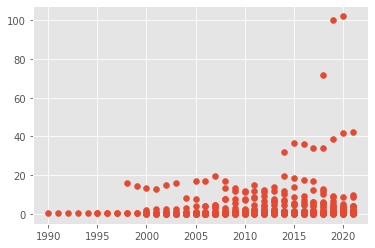

In [144]:
fig, ax = plt.subplots()
ax.scatter( country_df["mp_year"], country_df['Rice'], 
          #  hue = country_df['Country']
           )

In [145]:
country_df['Country'].unique()

array(['Afghanistan', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Bangladesh', 'Benin', 'Bhutan', 'Bolivia', 'Burundi', 'Cambodia',
       'Cape Verde', 'Central African Republic', 'Chad', 'China',
       'Colombia', 'Congo', 'Costa Rica',
       'Democratic Republic of the Congo', 'Djibouti',
       'Dominican Republic', 'Egypt', 'Ethiopia', 'Gabon', 'Gambia',
       'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Indonesia', 'Iraq', 'Japan', 'Kenya', 'Kyrgyzstan',
       "Lao People's Democratic Republic", 'Lebanon', 'Lesotho',
       'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mexico', 'Mongolia',
       'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Nicaragua', 'Niger',
       'Nigeria', 'Pakistan', 'Paraguay', 'Peru', 'Philippines', 'Rwanda',
       'Sierra Leone', 'South Sudan', 'Sri Lanka', 'State of Palestine',
       'Swaziland', 'Syrian Arab Republic', 'Tajikistan', 'Thailand',
       'Turkey', 'Uganda', 'Ukraine', 'United Republic of Ta

In [146]:
print(df_childMort.columns)
df_region.columns

Index(['Code', 'Year', 'Number of under-five deaths'], dtype='object')


Index(['Continent', 'Region', 'Country'], dtype='object')

### Join food wiith population

In [156]:

df_all = pd.merge(
    country_df,
    df_childMort,
    left_on=('Country', 'mp_year'),
    right_on=('Entity', "Year"),
        
    how='left',
    # on = 'Country',
    validate = 'one_to_one'
)
df_all = df_all.drop(['Year'], axis = 1)
df_all.head()

,index,Country,mp_year,Rice,Code,Number of under-five deaths
0,0,Afghanistan,2007,0.283790,AFG,112316.0
1,1,Afghanistan,2008,0.420083,AFG,108874.0
2,2,Afghanistan,2009,0.361595,AFG,105248.0
3,3,Afghanistan,2010,0.330410,AFG,101508.0
4,4,Afghanistan,2011,0.342172,AFG,97652.0


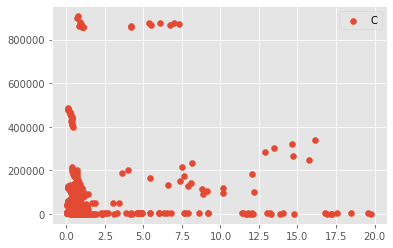

In [159]:
fig, ax = plt.subplots()
ax.scatter( df_all["Rice"], df_all['Number of under-five deaths'], 
          #  hue = country_df['Country']
           )
plt.legend('Country')
plt.show()

In [149]:
df_BirthDeathRate.columns

Index(['Code', 'Year', 'Death rate, crude (per 1,000 people)',
       'Birth rate, crude (per 1,000 people)',
       'Population (historical estimates)'],
      dtype='object')

# Joined tables: Food, ChildMort, df_BirthDeathRate

In [160]:
# join 
df_all = pd.merge(
    df_all,
    df_BirthDeathRate,
    left_on=('Code', 'mp_year'),
    right_on=('Code', "Year"),
        
    how='left',
    # on = 'Country',
    # validate = 'one_to_one'
)
df_all = df_all.drop(['Year'], axis = 1)
df_all.head()


,index,Country,mp_year,Rice,Code,Number of under-five deaths,"Death rate, crude (per 1,000 people)","Birth rate, crude (per 1,000 people)",Population (historical estimates)
0,0,Afghanistan,2007,0.283790,AFG,112316.0,9.287,42.944,27100542.0
1,1,Afghanistan,2008,0.420083,AFG,108874.0,8.932,41.949,27722281.0
2,2,Afghanistan,2009,0.361595,AFG,105248.0,8.584,40.903,28394806.0
3,3,Afghanistan,2010,0.330410,AFG,101508.0,8.250,39.829,29185511.0
4,4,Afghanistan,2011,0.342172,AFG,97652.0,7.936,38.750,30117411.0


# Join GDP table

In [161]:
df_all.columns

Index(['index', 'Country', 'mp_year', 'Rice', 'Code',
       'Number of under-five deaths', 'Death rate, crude (per 1,000 people)',
       'Birth rate, crude (per 1,000 people)',
       'Population (historical estimates)'],
      dtype='object')

In [162]:
df_test= pd.merge(
    df_all,
    df_gdp,
    left_on=('Country','mp_year' ),
    right_on=('Country', 'Year'),
    
    how='left',
    # on = 'Country',
    # validate = 'many_to_one'
)
df_all = df_test.drop(['Units', 'Year'] , axis = 1)
df_all.head()

,index,Country,mp_year,Rice,Code,Number of under-five deaths,"Death rate, crude (per 1,000 people)","Birth rate, crude (per 1,000 people)",Population (historical estimates),Value,Exchange Rate,GDP_in_USD,Continent,Region
0,0,Afghanistan,2007,0.283790,AFG,112316.0,9.287,42.944,27100542.0,662.650,96.02,6.901166,Asia,Southern Asia
1,1,Afghanistan,2008,0.420083,AFG,108874.0,8.932,41.949,27722281.0,688.247,96.02,7.167746,Asia,Southern Asia
2,2,Afghanistan,2009,0.361595,AFG,105248.0,8.584,40.903,28394806.0,829.924,96.02,8.643241,Asia,Southern Asia
3,3,Afghanistan,2010,0.330410,AFG,101508.0,8.250,39.829,29185511.0,899.956,96.02,9.372589,Asia,Southern Asia
4,4,Afghanistan,2011,0.342172,AFG,97652.0,7.936,38.750,30117411.0,958.266,96.02,9.979858,Asia,Southern Asia


In [176]:
description(df_all)

Datframe Shape: 
 (772, 14)
Null Values: 
 index                                   0
Country                                 0
mp_year                                 0
Rice                                    0
Code                                    0
Number of under-five deaths             0
Death rate, crude (per 1,000 people)    0
Birth rate, crude (per 1,000 people)    0
Population (historical estimates)       0
Value                                   0
Exchange Rate                           0
GDP_in_USD                              0
Continent                               0
Region                                  0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 772 entries, 0 to 1041
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   index                                 772 non-null    int64  
 1   Country                               772 no

In [153]:
# df_gdp= pd.merge(
#     df_gdp,
#     df_region,
#     left_on=('Country'),
#     right_on=('Country'),
    
#     how='left',
#     # on = 'Country',
#     validate = 'many_to_one'
# )
# df_gdp.shape

(3743, 8)

## JAMES PIVOT CODE 

In [ ]:
# country_df = df_retail[['Country','mp_year','cm_name','mp_price']]
# country_df = country_df.groupby(by=['Country','mp_year','cm_name']).mean().reset_index(level=['Country', 'mp_year','cm_name'])
# country_df = country_df.pivot(index=["Country", "mp_year"], columns=["cm_name"],values="mp_price").reset_index(level=['Country', 'mp_year'])
# country_df.reset_index(inplace=True,drop=True)
# country_df.head()

## Retail prices

In [ ]:
# df_retail = df.loc[df['pt_name'] == 'Retail']
# df_retail.nunique()

## Currency Conversion Table

In [ ]:
df_currency = df.loc[df['cm_name'] == 'Exchange']
df_currency.nunique()

## Reshaping table

In [226]:
df_all.head()

,index,Country,mp_year,Rice,Code,Number of under-five deaths,"Death rate, crude (per 1,000 people)","Birth rate, crude (per 1,000 people)",Population (historical estimates),Value,Exchange Rate,GDP_in_USD,Continent,Region
0,0,Afghanistan,2007,0.283790,AFG,112316.0,9.287,42.944,27100542.0,662.650,96.02,6.901166,Asia,Southern Asia
1,1,Afghanistan,2008,0.420083,AFG,108874.0,8.932,41.949,27722281.0,688.247,96.02,7.167746,Asia,Southern Asia
2,2,Afghanistan,2009,0.361595,AFG,105248.0,8.584,40.903,28394806.0,829.924,96.02,8.643241,Asia,Southern Asia
3,3,Afghanistan,2010,0.330410,AFG,101508.0,8.250,39.829,29185511.0,899.956,96.02,9.372589,Asia,Southern Asia
4,4,Afghanistan,2011,0.342172,AFG,97652.0,7.936,38.750,30117411.0,958.266,96.02,9.979858,Asia,Southern Asia


## Statistcal Inference Analysis of the dataframe

In [ ]:
### Heat Map for whole dataframe

In [ ]:
df_every = df_all

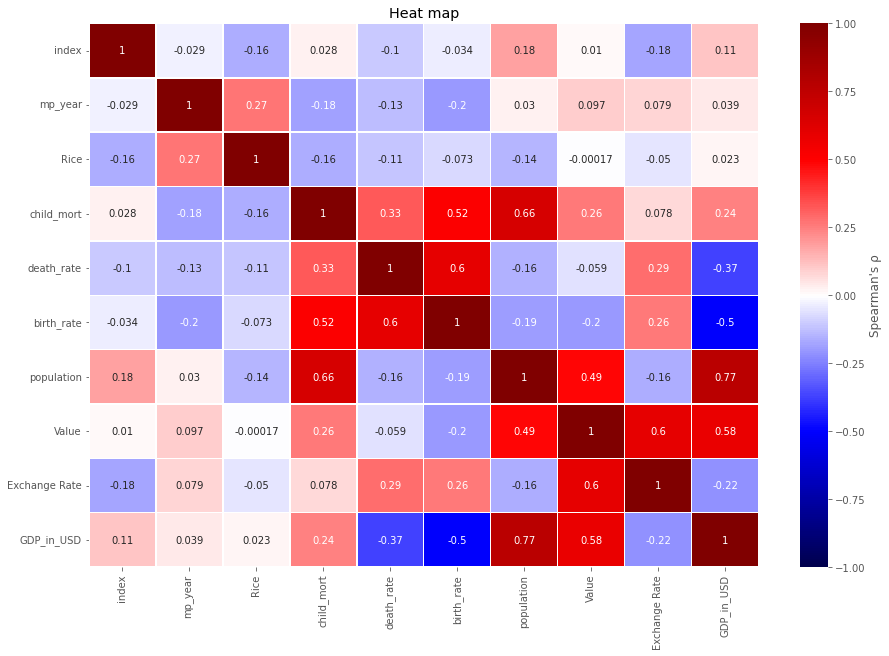

In [225]:
df_cm = df_every.corr(method = 'spearman')

plt.figure(figsize=(15,10))
ax = sns.heatmap(df_cm, cmap="seismic", annot=True, linewidths=.5, cbar_kws={"label": "Spearman's ρ"}, vmin=-1, vmax=1);
ax.set_title("Heat map");

<li> Heat map shows strong positive correlatioon between GDP and population, 

In [200]:
# df_every_Afghanistan = df_every[df_every('Country' == 'Afghanistan')
df_every_Afghanistan = df_every[df_every.Country == "Afghanistan"]
df_every_Afghanistan.head()

,index,Country,mp_year,Rice,Code,child_mort,death_rate,birth_rate,population,Value,Exchange Rate,GDP_in_USD,Continent,Region
0,0,Afghanistan,2007,0.283790,AFG,112316.0,9.287,42.944,27100542.0,662.650,96.02,6.901166,Asia,Southern Asia
1,1,Afghanistan,2008,0.420083,AFG,108874.0,8.932,41.949,27722281.0,688.247,96.02,7.167746,Asia,Southern Asia
2,2,Afghanistan,2009,0.361595,AFG,105248.0,8.584,40.903,28394806.0,829.924,96.02,8.643241,Asia,Southern Asia
3,3,Afghanistan,2010,0.330410,AFG,101508.0,8.250,39.829,29185511.0,899.956,96.02,9.372589,Asia,Southern Asia
4,4,Afghanistan,2011,0.342172,AFG,97652.0,7.936,38.750,30117411.0,958.266,96.02,9.979858,Asia,Southern Asia


In [ ]:
# df_every_Afghanistan.hist(figsize=(20,20)) # Ramila Created a histogram for Rice  in Afghanistan
# plt.show()

In [180]:
df_every.columns

Index(['index', 'Country', 'mp_year', 'Rice', 'Code',
       'Number of under-five deaths', 'Death rate, crude (per 1,000 people)',
       'Birth rate, crude (per 1,000 people)',
       'Population (historical estimates)', 'Value', 'Exchange Rate',
       'GDP_in_USD', 'Continent', 'Region'],
      dtype='object')

In [191]:
df_every = df_every.rename(columns = { 'Number of under-five deaths': 'child_mort',
                                      'Death rate, crude (per 1,000 people)': 'death_rate',
                                      'Birth rate, crude (per 1,000 people)': 'birth_rate',
                                       'Population (historical estimates)': 'population'})

In [192]:
df_every.columns

Index(['index', 'Country', 'mp_year', 'Rice', 'Code', 'child_mort',
       'death_rate', 'birth_rate', 'population', 'Value', 'Exchange Rate',
       'GDP_in_USD', 'Continent', 'Region'],
      dtype='object')

## Linear Regression Analysis

### Birth Rate Analysis

In [209]:
m = sm.ols('birth_rate ~ GDP_in_USD +death_rate + child_mort+ Rice ', data = df_every) # Model with just Rice and GDP 
m = m.fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             birth_rate   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     176.3
Date:                Sun, 05 Dec 2021   Prob (F-statistic):          4.70e-107
Time:                        23:44:01   Log-Likelihood:                -2637.5
No. Observations:                 772   AIC:                             5285.
Df Residuals:                     767   BIC:                             5308.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.8596      0.741     20.061      0.000      13.406      16.314
GDP_in_USD    -0.0023      0.000    -10.131      0.000      -0.003      -0.002
death_rate     1.7507      0.084     20.828      0.000       1.586       1.916
child_mort  8.965e-06   1.97e-06      4.543      0.000    5.09e-06    1.28e-05
Rice          -0.2829      0.089     -3.185      0.002      -0.457      -0.109
==============================================================================
Omnibus:                       42.414   Durbin-Watson:                   0.236
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.394
Skew:                          -0.529   Prob(JB):                     6.92e-12
Kurtosis:                       3.692   Cond. No.                     4.43e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### child mortality analysis

In [210]:
m = sm.ols('child_mort ~ GDP_in_USD + death_rate + birth_rate + Rice ', data = df_every) # Model with just Rice and GDP 
m = m.fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             child_mort   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     27.72
Date:                Sun, 05 Dec 2021   Prob (F-statistic):           1.61e-21
Time:                        23:44:53   Log-Likelihood:                -10204.
No. Observations:                 772   AIC:                         2.042e+04
Df Residuals:                     767   BIC:                         2.044e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.986e+04   1.62e+04     -5.549      0.000   -1.22e+05   -5.81e+04
GDP_in_USD    12.1585      4.353      2.793      0.005       3.614      20.703
death_rate  7610.2920   1879.032      4.050      0.000    3921.637    1.13e+04
birth_rate  2922.7339    643.372      4.543      0.000    1659.754    4185.714
Rice        6485.7186   1596.863      4.062      0.000    3350.978    9620.460
==============================================================================
Omnibus:                      643.705   Durbin-Watson:                   0.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11033.382
Skew:                           3.860   Prob(JB):                         0.00
Kurtosis:                      19.835   Cond. No.                     4.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### mortality rate analysis

In [211]:
m = sm.ols('death_rate ~ GDP_in_USD + birth_rate + Rice +child_mort', data = df_every) # Model with just Rice and GDP 
m = m.fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             death_rate   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     144.3
Date:                Sun, 05 Dec 2021   Prob (F-statistic):           5.70e-92
Time:                        23:45:05   Log-Likelihood:                -1812.1
No. Observations:                 772   AIC:                             3634.
Df Residuals:                     767   BIC:                             3657.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9968      0.306      6.534      0.000       1.397       2.597
GDP_in_USD     0.0004   8.18e-05      5.082      0.000       0.000       0.001
birth_rate     0.2064      0.010     20.828      0.000       0.187       0.226
Rice          -0.0421      0.031     -1.373      0.170      -0.102       0.018
child_mort  2.751e-06   6.79e-07      4.050      0.000    1.42e-06    4.08e-06
==============================================================================
Omnibus:                      218.861   Durbin-Watson:                   0.278
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              551.068
Skew:                           1.469   Prob(JB):                    2.17e-120
Kurtosis:                       5.916   Cond. No.                     5.30e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Visual Inspection

### Rice contribution to the birth rate

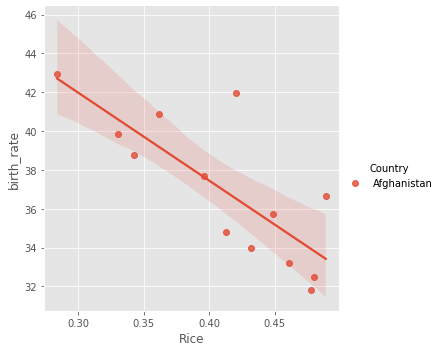

In [214]:
sns.lmplot(x = 'Rice',  y = 'birth_rate', hue = "Country", 
           data = df_every_Afghanistan,
           );
    

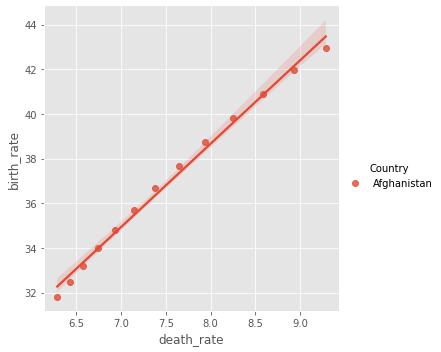

In [219]:
sns.lmplot(x = 'death_rate',  y = 'birth_rate', hue = "Country", 
           data = df_every_Afghanistan,
           );

### Rice contribution to regions

In [220]:
df_every.head()

,index,Country,mp_year,Rice,Code,child_mort,death_rate,birth_rate,population,Value,Exchange Rate,GDP_in_USD,Continent,Region
0,0,Afghanistan,2007,0.283790,AFG,112316.0,9.287,42.944,27100542.0,662.650,96.02,6.901166,Asia,Southern Asia
1,1,Afghanistan,2008,0.420083,AFG,108874.0,8.932,41.949,27722281.0,688.247,96.02,7.167746,Asia,Southern Asia
2,2,Afghanistan,2009,0.361595,AFG,105248.0,8.584,40.903,28394806.0,829.924,96.02,8.643241,Asia,Southern Asia
3,3,Afghanistan,2010,0.330410,AFG,101508.0,8.250,39.829,29185511.0,899.956,96.02,9.372589,Asia,Southern Asia
4,4,Afghanistan,2011,0.342172,AFG,97652.0,7.936,38.750,30117411.0,958.266,96.02,9.979858,Asia,Southern Asia


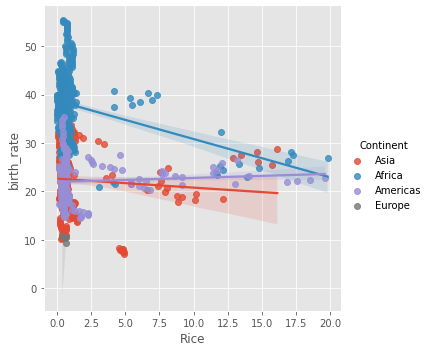

In [216]:
sns.lmplot(x = 'Rice',  y = 'birth_rate', hue = "Continent", 
           data = df_every,
           );

<li> We have observed negative correlation between rice price and birth rate in Africa and 

In [223]:
df_rice = df_every[(np.abs(stats.zscore(df_every)) < 3).all(axis = 1)]


TypeError: ignored

<Figure size 432x288 with 0 Axes>

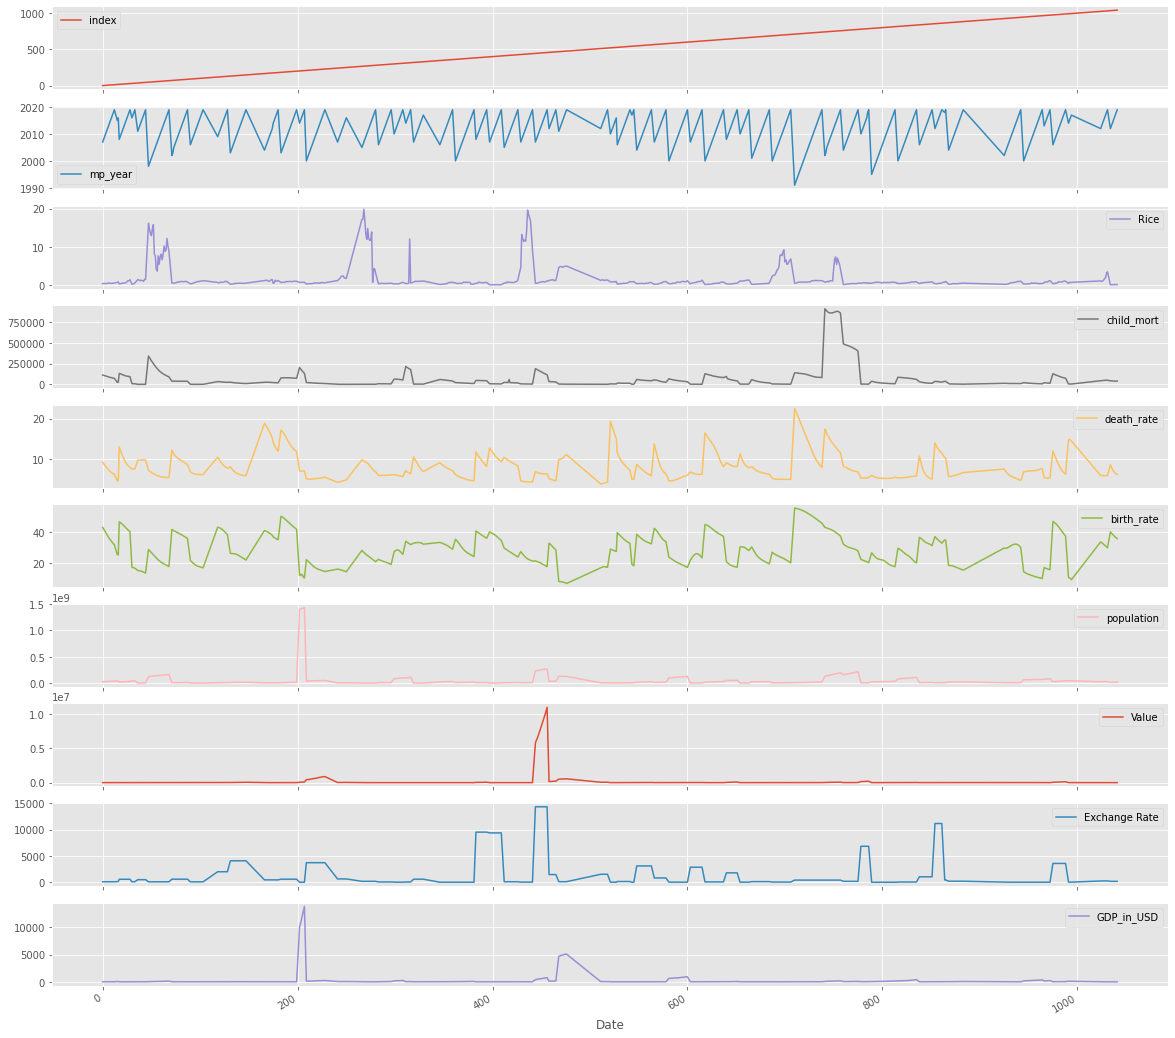

In [218]:
plt.figure()
df_every.plot(subplots=True, figsize=(20,20))
plt.xlabel("Date");

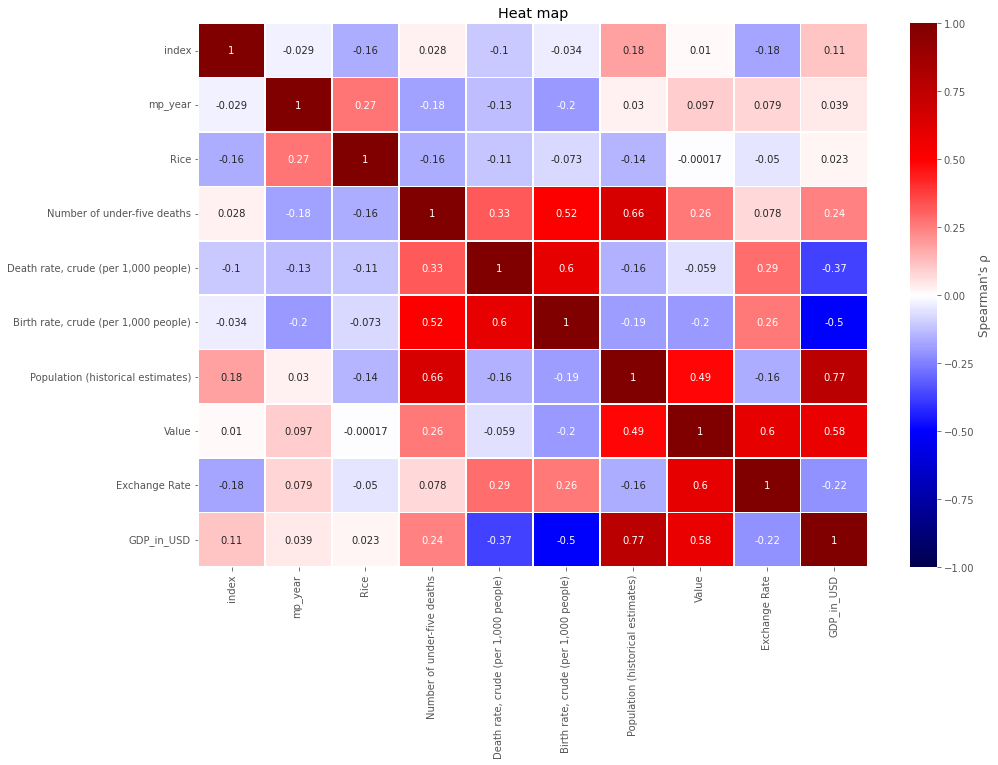

In [175]:
df_cm = df_all.corr(method = 'spearman')

plt.figure(figsize=(15,10))
ax = sns.heatmap(df_cm, cmap="seismic", annot=True, linewidths=.5, cbar_kws={"label": "Spearman's ρ"}, vmin=-1, vmax=1);
ax.set_title("Heat map");